Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning_Day              0
dtype: int64


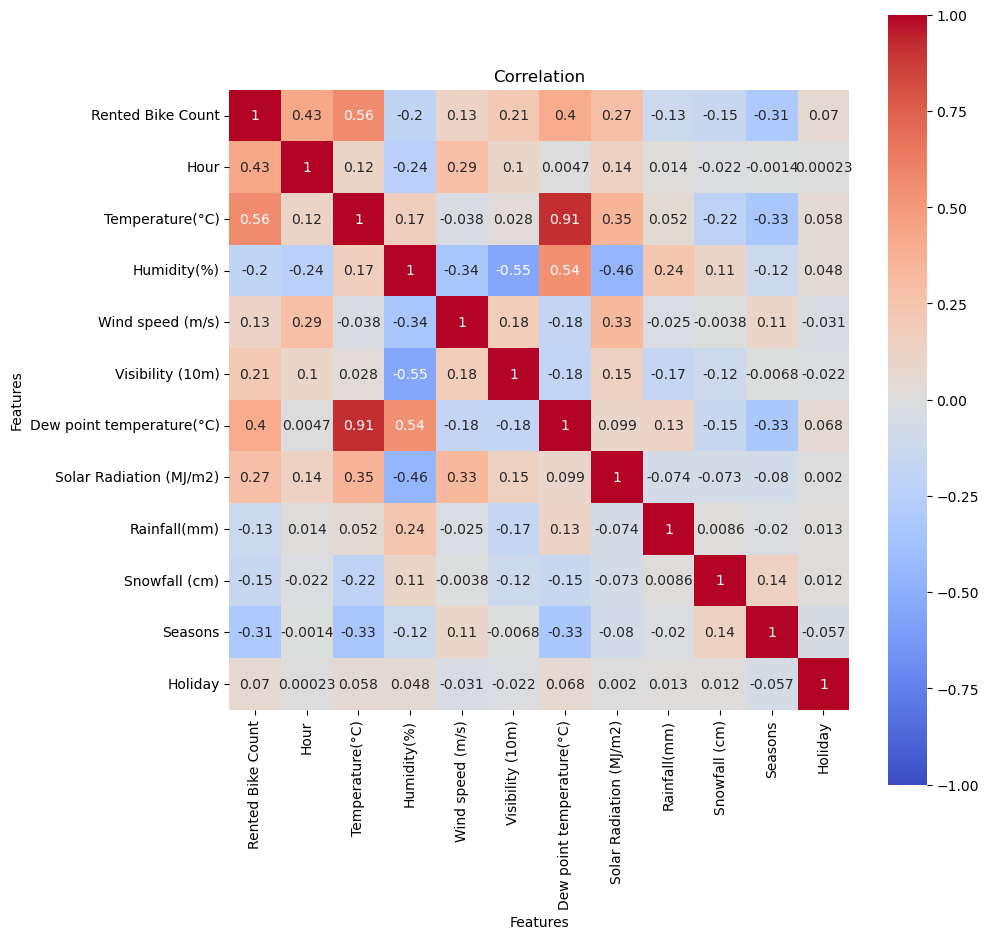

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 

# Step 1: Data Pre-processing
# Load the dataset
data = pd.read_csv('SeoulBikeData.csv', encoding='utf-8')

# Drop Date column
data = data.drop('Date', axis=1)

# Check for missing values
check_missing = data.isna().sum()
print(check_missing)

# Convert categorical attributes
columns_to_encode = ['Holiday', 'Seasons']
for column in columns_to_encode:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

# Remove rows where Functioning_Day is 'No'
data = data[data['Functioning_Day'] == 'Yes']

# Drop Functioning_Day column
data = data.drop('Functioning_Day', axis=1)

plt.figure(figsize=(10,10))
sns.heatmap(data.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)
plt.title('Correlation')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()
#Drop Dew Point Temperature 
data = data.drop('Dew point temperature(°C)', axis=1)

In [7]:
# Split features and labels
X = data.drop(['Rented Bike Count'], axis=1)
y = data['Rented Bike Count']

# Print the shapes of the feature and label datasets
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


Features shape: (8465, 10)
Labels shape: (8465,)


Linear Regression:
Mean Squared Error (MSE): 196491.90896278663
R-squared (R2) Score: 0.5462951028598441
Mean Absolute Error(MAE): 328.60577881572084
Adjusted R2: 0.5445011582629563



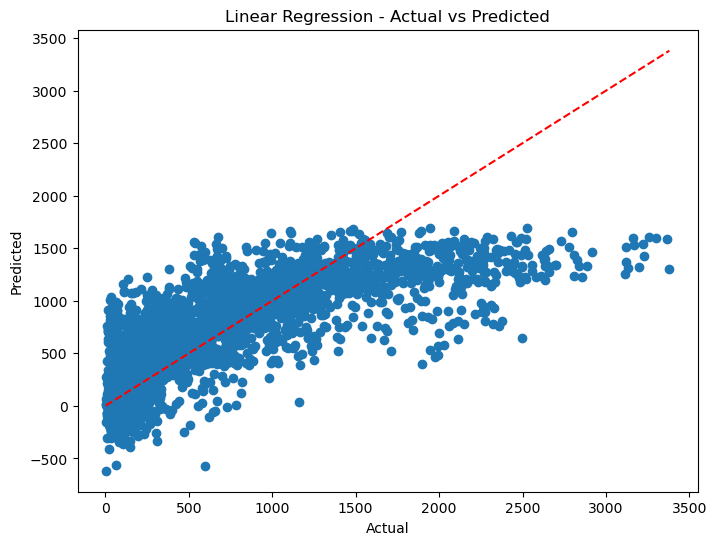

K-Nearest Neighbors:
Mean Squared Error (MSE): 164402.7761166786
R-squared (R2) Score: 0.620389740110366
Mean Absolute Error(MAE): 287.65336435218325
Adjusted R2: 0.6188887649634264



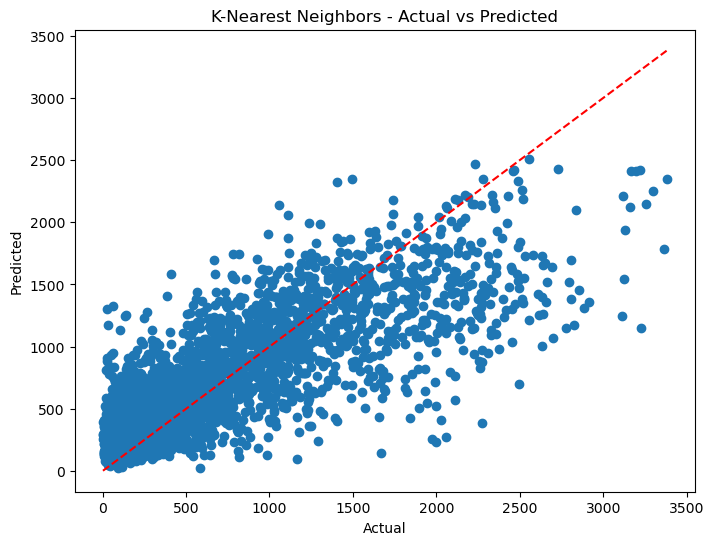

Decision Tree:
Mean Squared Error (MSE): 115802.87294201861
R-squared (R2) Score: 0.7326081728553838
Mean Absolute Error(MAE): 203.1406585540444
Adjusted R2: 0.731550908262073



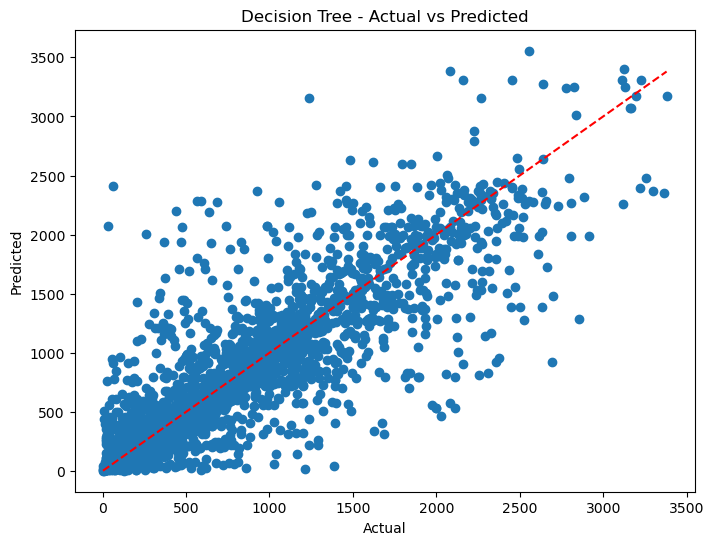

Random Forest:
Mean Squared Error (MSE): 59656.61028013601
R-squared (R2) Score: 0.8622513447309142
Mean Absolute Error(MAE): 151.07346098783106
Adjusted R2: 0.8617066879343794



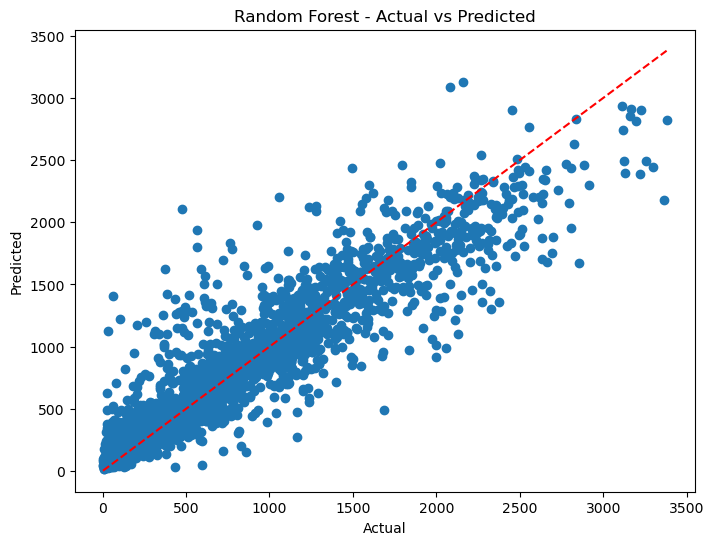

Gradient Boosting:
Mean Squared Error (MSE): 65928.48376743073
R-squared (R2) Score: 0.8477694267198879
Mean Absolute Error(MAE): 170.44904610220706
Adjusted R2: 0.8471675085652937



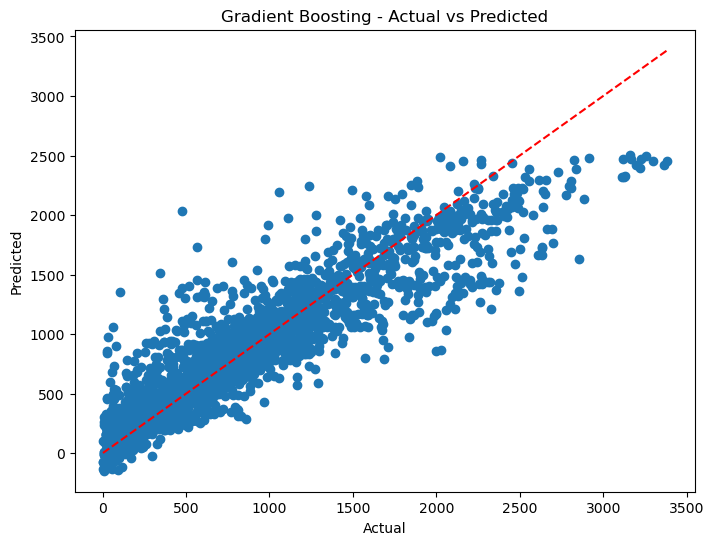

In [8]:
# Initialize the models
models = [
    ("Linear Regression", LinearRegression()),
    ("K-Nearest Neighbors", KNeighborsRegressor(n_neighbors=10)),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, random_state=42))
]
# Train and evaluate each model
mse_scores = []
r2_scores = []
mae_scores = []
for model_name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    n = len(y_test)
    p = 11
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse_scores.append(mse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    print(f"{model_name}:")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)
    print("Mean Absolute Error(MAE):", mae)
    print("Adjusted R2:", adjusted_r2)
    print()
    
    # Plot scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.show()


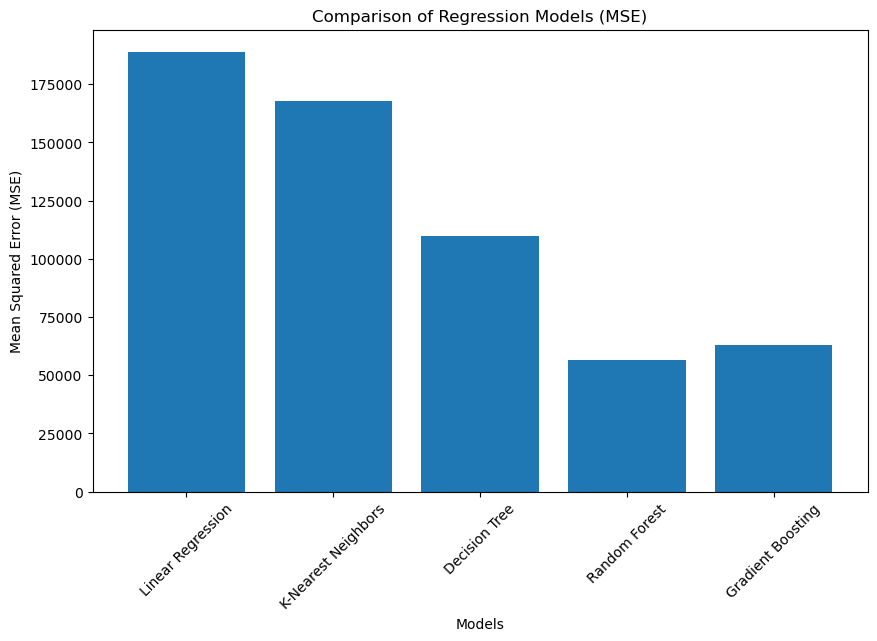

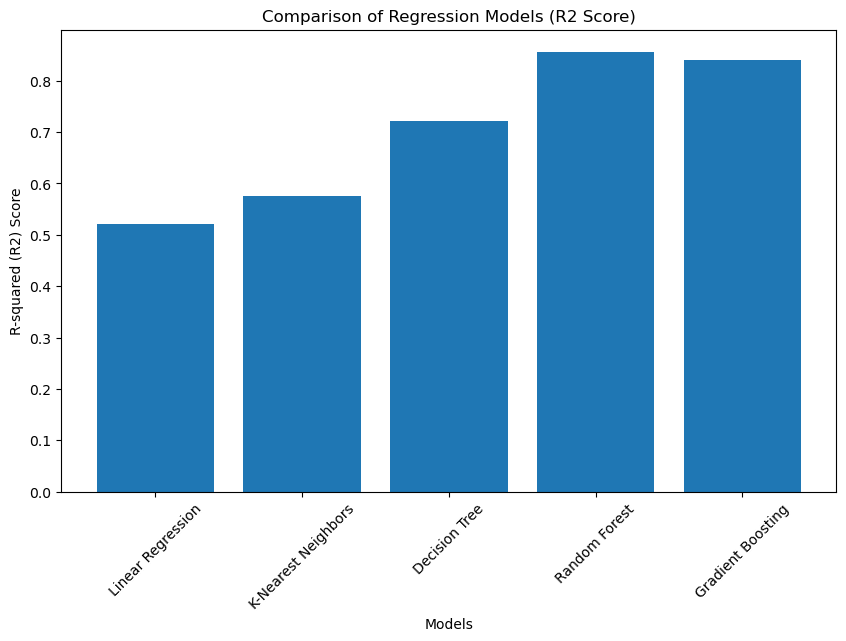

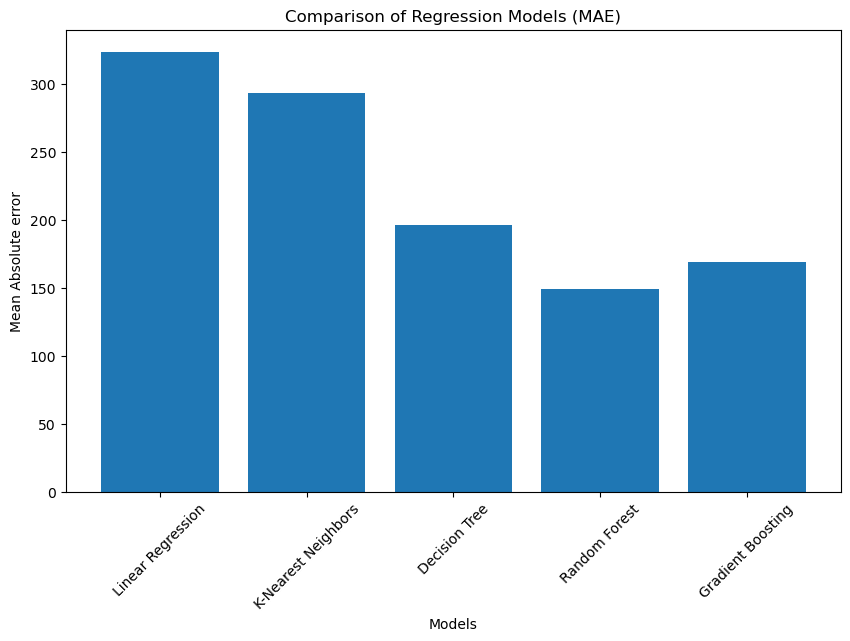

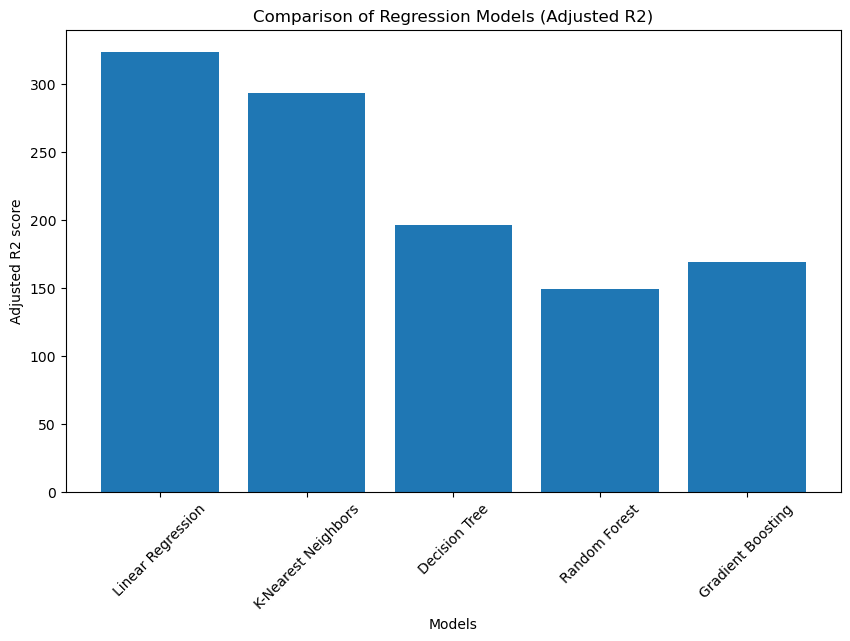

In [6]:
# Plot the MSE scores
plt.figure(figsize=(10, 6))
plt.bar([model_name for model_name, _ in models], mse_scores)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Models (MSE)")
plt.xticks(rotation=45)
plt.show()

# Plot the R2 scores
plt.figure(figsize=(10, 6))
plt.bar([model_name for model_name, _ in models], r2_scores)
plt.xlabel("Models")
plt.ylabel("R-squared (R2) Score")
plt.title("Comparison of Regression Models (R2 Score)")
plt.xticks(rotation=45)
plt.show()

#Plot the MAE scores
plt.figure(figsize=(10, 6))
plt.bar([model_name for model_name, _ in models], mae_scores)
plt.xlabel("Models")
plt.ylabel("Mean Absolute error")
plt.title("Comparison of Regression Models (MAE)")
plt.xticks(rotation=45)
plt.show()

#Plot adjusted R2
plt.figure(figsize=(10, 6))
plt.bar([model_name for model_name, _ in models], mae_scores)
plt.xlabel("Models")
plt.ylabel("Adjusted R2 score")
plt.title("Comparison of Regression Models (Adjusted R2)")
plt.xticks(rotation=45)
plt.show()